# Quickstart

If you have an already installed Python3 environment in your operating system, the easiest way to install Deep-Transit is to using ``pip``:
```
pip install deep-transit -U
```

The detailed information can be found in our [installation instructions](../installation.rst).

Once you have successfully installed the Deep-Transit package, you can download our released model for your transit detection.
We have released two pretrained models, one trained from Kepler and the other trained from TESS ([download Kepler model](http://paperdata.china-vo.org/ckm/kepler_snr_model.pth), [download TESS model](http://paperdata.china-vo.org/ckm/kepler_snr_model.pth)).

In [1]:
model_path = '/home/ckm/model_Kepler.pth'

After you have downlaod the pretrained model, the transit detection can be fairly easy!
For example, we can download a light curve of [Kepler-1b](https://simbad.u-strasbg.fr/simbad/sim-id?Ident=Kepler-1b) with the help of [lightkurve](https://docs.lightkurve.org/index.html).

<AxesSubplot:xlabel='Time - 2454833 [BKJD days]', ylabel='Flux [$\\mathrm{e^{-}\\,s^{-1}}$]'>

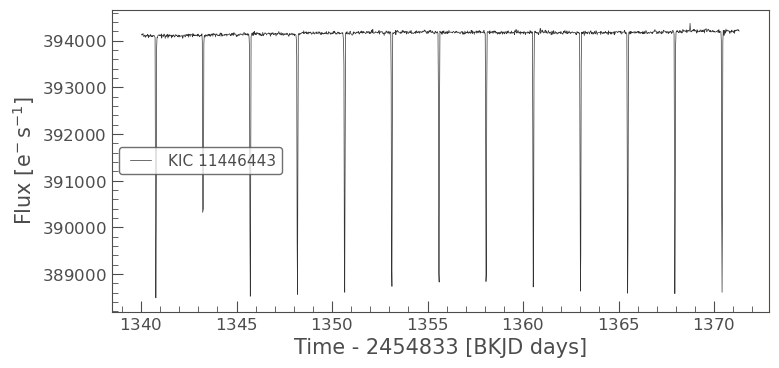

In [2]:
import lightkurve as lk
lc = lk.search_lightcurve('Kepler-1b', quarter=14, exptime='long').download();
lc = lc[lc.time.value>1340] # To save computating time
lc.plot()

Our Deep-Transit package can be seamlessly accept a ``LightCurve`` object, so the detection can be finished in one line

In [3]:
import deep_transit as dt
bboxes = dt.DeepTransit(lc, is_flat=True).transit_detection(model_path)

Loading Model: /home/ckm/model_Kepler.pth


/home/ckm/Deep-Transit/src/deep_transit/dt_lightcurve.py:317: UserWarning: The total number of progress bar is the upper limit.
100%|██████████| 4/4 [00:12<00:00,  3.10s/it]


Now you have finished your first transit detection, you can plot the detected bounding boxes with the light curve.

<AxesSubplot:xlabel='Time (day)', ylabel='Normalized Flux'>

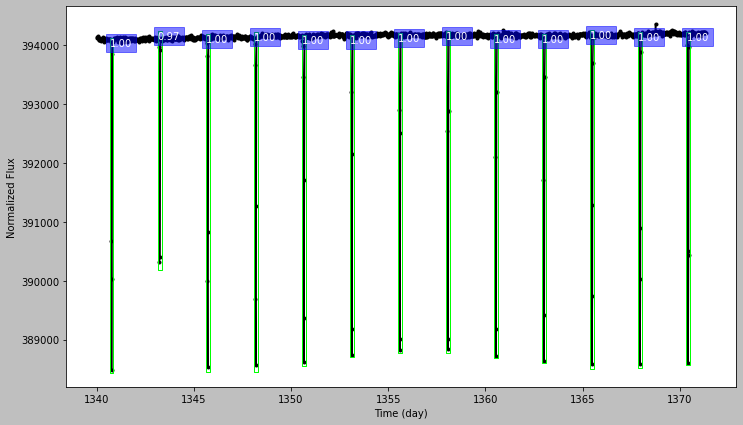

In [4]:
dt.plot_lc_with_bboxes(lc, bboxes, ms=3, marker='o')

This plot shows the light cuvre with detected transiting signals, the number at the top of each bounding box is the confidence level, which can be an indicator of signal-to-noise ratio.